In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1=pd.read_csv('data1.csv')
df2=pd.read_csv('data2.csv')

In [ ]:
df1.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [ ]:
df2.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [ ]:
df1.shape

(1338, 5)

In [ ]:
df2.shape

(1338, 4)

In [ ]:
df = pd.merge(df2, df1, how="inner",left_on='Policy no.',right_on='Policy no.')

In [ ]:
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.400,1826.84300
1,PLC157033,1,no,southwest,19,male,24.600,1837.23700
2,PLC157060,0,no,southwest,56,male,40.300,10602.38500
3,PLC157087,1,no,southwest,30,female,32.400,4149.73600
4,PLC157186,5,no,southwest,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,northeast,39,male,29.925,22462.04375
1334,PLC168436,0,yes,northeast,18,female,21.660,14283.45940
1335,PLC168634,2,yes,northeast,42,male,24.605,21259.37795
1336,PLC168652,0,yes,northeast,29,female,21.850,16115.30450


In [ ]:
import seaborn as sns

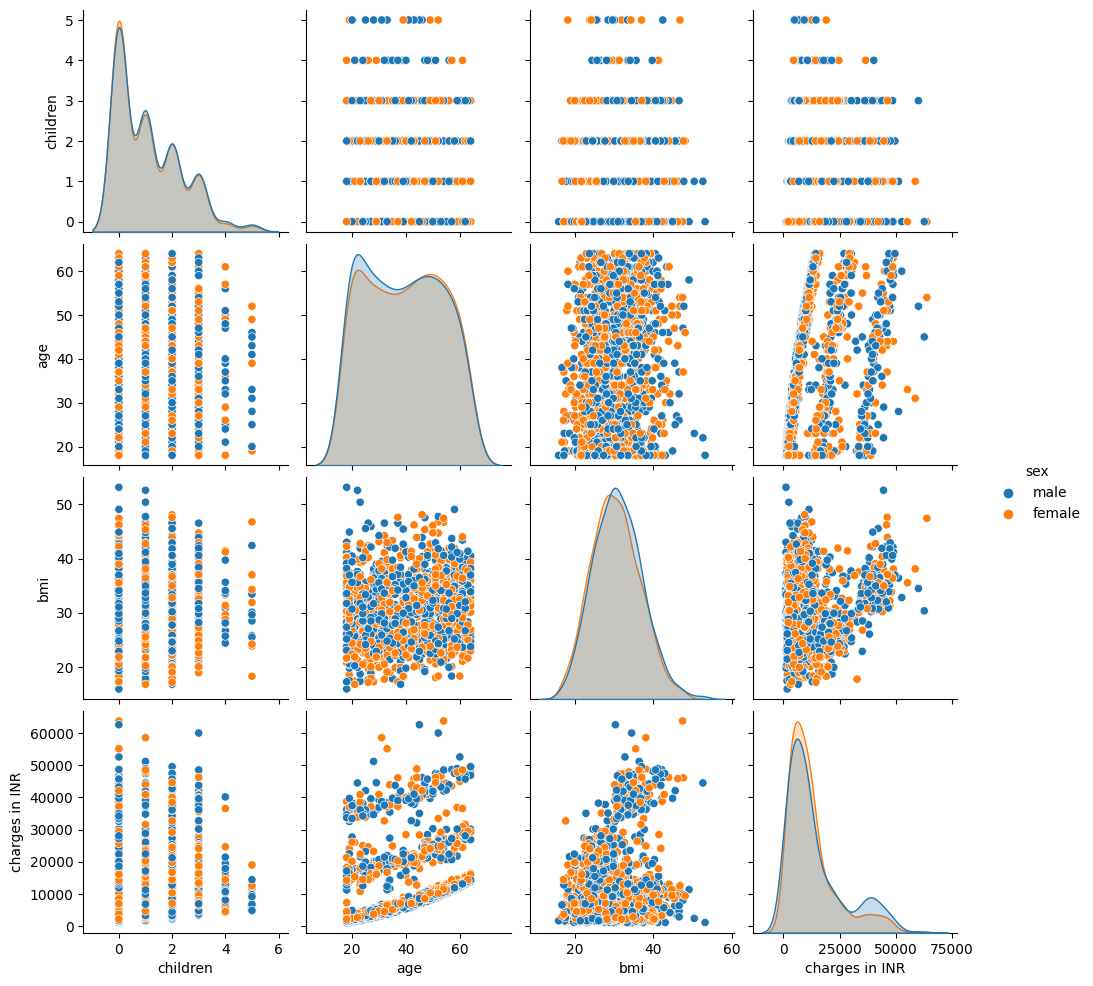

In [ ]:
sns.pairplot(data=df,hue='sex')

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


In [ ]:
# checking for outliers
import plotly.express as px
fig = px.box(df, y="charges in INR",x="sex",color='smoker')
fig.show()

In [ ]:
import plotly.express as px
fig = px.box(df, y="charges in INR",x="region",color='sex')
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="charges in INR", color="smoker")
fig.show()
# smokers are paying high as compared to people not smoking

In [ ]:
fig = px.scatter(df, x="age", y="charges in INR", color="region")
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="charges in INR", color="smoker")
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="charges in INR")
fig.show()

In [ ]:
fig = px.scatter(df, x="bmi", y="charges in INR")
fig.show()

under 18.5 – This is described as underweight.
between 18.5 and 24.9 – This is described as the 'healthy range'.
between 25 and 29.9 – This is described as overweight.
between 30 and 39.9 – This is described as obesity.
40 or over – This is described as severe obesity.

In [ ]:
fig = px.scatter(df, x="age", y="charges in INR",color='bmi')
fig.show()

In [ ]:
fig = px.scatter(df, x="age", y="bmi",color='smoker')
fig.show()

In [ ]:
# checking correlation
df.corr()

<ipython-input-81-f7ae3bb3d59c>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,children,age,bmi,charges in INR
children,1.000000,0.042469,0.012759,0.067998
age,0.042469,1.000000,0.109272,0.299008
bmi,0.012759,0.109272,1.000000,0.198341
charges in INR,0.067998,0.299008,0.198341,1.000000


In [ ]:
# encoding the data
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [ ]:
# encoding the data
# smoker- ohe
#sex-ohe
#region-label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region']= le.fit_transform(df['region'])

In [ ]:
df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,3,23,male,34.400,1826.84300
1,PLC157033,1,no,3,19,male,24.600,1837.23700
2,PLC157060,0,no,3,56,male,40.300,10602.38500
3,PLC157087,1,no,3,30,female,32.400,4149.73600
4,PLC157186,5,no,3,19,female,28.600,4687.79700
...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,0,39,male,29.925,22462.04375
1334,PLC168436,0,yes,0,18,female,21.660,14283.45940
1335,PLC168634,2,yes,0,42,male,24.605,21259.37795
1336,PLC168652,0,yes,0,29,female,21.850,16115.30450


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
s=ohe.fit_transform(df[['smoker','sex']]).toarray()


In [ ]:
h=pd.DataFrame(s)

In [ ]:
new_df = df.join(h)

In [ ]:
new_df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,0,1
0,PLC157006,0,no,3,23,male,34.400,1826.84300,0.0,1.0
1,PLC157033,1,no,3,19,male,24.600,1837.23700,0.0,1.0
2,PLC157060,0,no,3,56,male,40.300,10602.38500,0.0,1.0
3,PLC157087,1,no,3,30,female,32.400,4149.73600,0.0,0.0
4,PLC157186,5,no,3,19,female,28.600,4687.79700,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,0,39,male,29.925,22462.04375,1.0,1.0
1334,PLC168436,0,yes,0,18,female,21.660,14283.45940,1.0,0.0
1335,PLC168634,2,yes,0,42,male,24.605,21259.37795,1.0,1.0
1336,PLC168652,0,yes,0,29,female,21.850,16115.30450,1.0,0.0


In [ ]:
new_df.rename(columns = {0:'smoke',1:'Gender'}, inplace = True)

In [ ]:
new_df

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR,smoke,Gender
0,PLC157006,0,no,3,23,male,34.400,1826.84300,0.0,1.0
1,PLC157033,1,no,3,19,male,24.600,1837.23700,0.0,1.0
2,PLC157060,0,no,3,56,male,40.300,10602.38500,0.0,1.0
3,PLC157087,1,no,3,30,female,32.400,4149.73600,0.0,0.0
4,PLC157186,5,no,3,19,female,28.600,4687.79700,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,PLC168400,1,yes,0,39,male,29.925,22462.04375,1.0,1.0
1334,PLC168436,0,yes,0,18,female,21.660,14283.45940,1.0,0.0
1335,PLC168634,2,yes,0,42,male,24.605,21259.37795,1.0,1.0
1336,PLC168652,0,yes,0,29,female,21.850,16115.30450,1.0,0.0


In [ ]:
df=new_df.drop(['smoker','sex','Policy no.'],axis=1)

In [ ]:
df

,children,region,age,bmi,charges in INR,smoke,Gender
0,0,3,23,34.400,1826.84300,0.0,1.0
1,1,3,19,24.600,1837.23700,0.0,1.0
2,0,3,56,40.300,10602.38500,0.0,1.0
3,1,3,30,32.400,4149.73600,0.0,0.0
4,5,3,19,28.600,4687.79700,0.0,0.0
...,...,...,...,...,...,...,...
1333,1,0,39,29.925,22462.04375,1.0,1.0
1334,0,0,18,21.660,14283.45940,1.0,0.0
1335,2,0,42,24.605,21259.37795,1.0,1.0
1336,0,0,29,21.850,16115.30450,1.0,0.0


<Axes: >

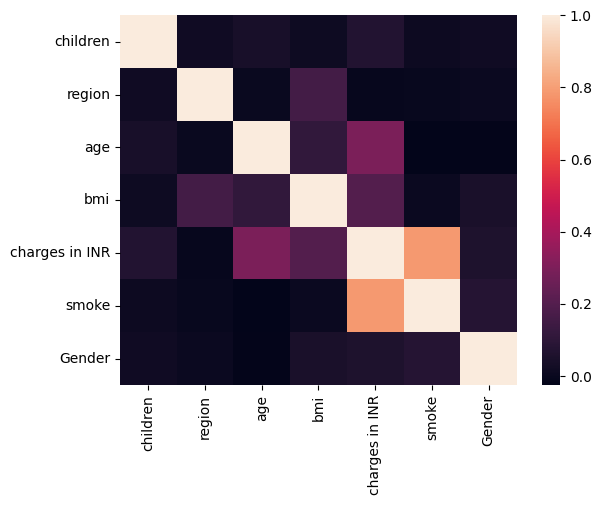

In [ ]:
sns.heatmap(df.corr())

#Health Status (BMI) and Discounts:

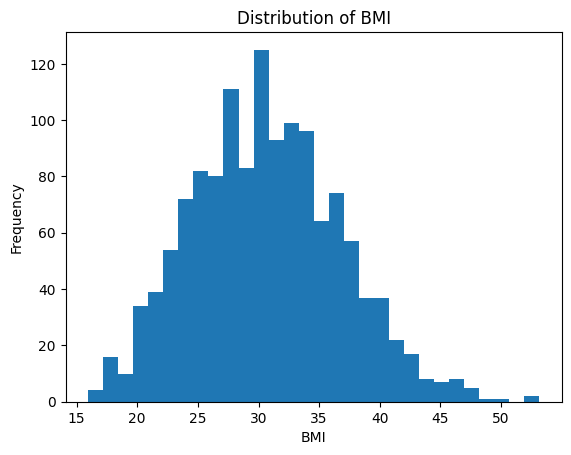

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['bmi'], bins=30)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI')
plt.show()

In [ ]:
# Split dataset into two groups based on BMI threshold
threshold = 30
below_threshold = df[df['bmi'] < threshold]
above_threshold = df[df['bmi'] >= threshold]


avg_claim_below = below_threshold['charges in INR'].mean()
avg_claim_above = above_threshold['charges in INR'].mean()

# Compare average claim amounts between the groups
print(f"Average Claim Amount (BMI Below Threshold): {avg_claim_below}")
print(f"Average Claim Amount (BMI Above Threshold): {avg_claim_above}")


Average Claim Amount (BMI Below Threshold): 10713.666900584785
Average Claim Amount (BMI Above Threshold): 15552.335468868458


The t-test is a statistical test used to determine if there is a significant difference between the means of two groups or populations. It helps to determine whether the observed difference between the means is statistically significant or just due to random chance.

Cohen's d is a measure of effect size that quantifies the difference between two means in terms of standard deviation units. It is often used in statistical analysis to determine the magnitude of the difference between two groups or populations.

Cohen's d is calculated by taking the difference between the means of the two groups and dividing it by the pooled standard deviation. The formula for Cohen's d is:

d = (M1 - M2) / SDpooled

where M1 and M2 are the means of the two groups being compared, and SDpooled is the pooled standard deviation, which combines the standard deviations of both groups.

The resulting value of Cohen's d represents the standardized difference between the means. A positive value indicates that the mean of the first group is higher than the mean of the second group, while a negative value indicates the opposite. The magnitude of Cohen's d is often interpreted as follows:

Small effect size: d = 0.2
Medium effect size: d = 0.5
Large effect size: d = 0.8
Cohen's d allows researchers to assess the practical significance or meaningfulness of the difference between groups beyond statistical significance. It provides a standardized measure that can be compared across different studies and contexts, helping to interpret the importance of the observed differences.

In [ ]:
# Perform statistical tests to determine if the difference is significant
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(below_threshold['charges in INR'], above_threshold['charges in INR'])
effect_size = (avg_claim_below - avg_claim_above) / below_threshold['charges in INR'].std()  # Cohen's d

print(f"p-value: {p_value}")
print(statistic)
print(f"Effect Size (Cohen's d): {effect_size}")

p-value: 1.7585561273950846e-13
-7.442815495893553
Effect Size (Cohen's d): -0.6168988007687152


A negative value indicates that the mean of the first group is lower than the mean of the second group. and p value is less than significant value, so there is no significant difference between the means of two groups or populations.
thus it doesnot suppotrt offering discounts

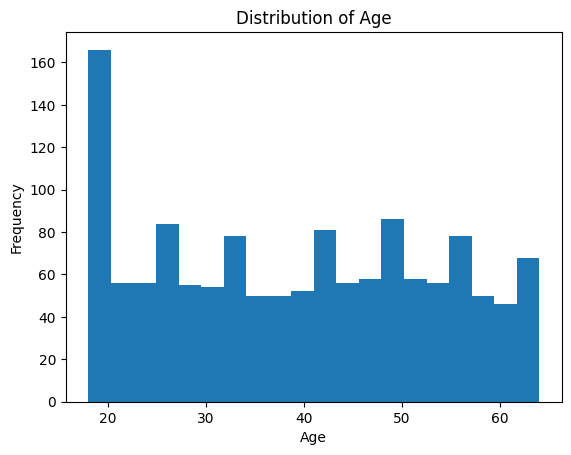

In [ ]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()


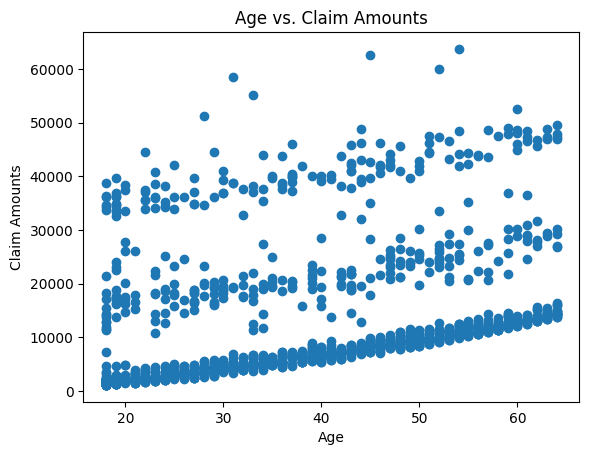

In [ ]:

# Line plot or scatter plot of age vs. claim amounts
plt.plot(df['age'], df['charges in INR'], 'o')
plt.xlabel('Age')
plt.ylabel('Claim Amounts')
plt.title('Age vs. Claim Amounts')
plt.show()

In [ ]:
from scipy.stats import pearsonr

# Calculate correlation coefficient and p-value
correlation, p_value = pearsonr(df['age'], df['charges in INR'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Correlation coefficient: 0.29900819333064765
P-value: 4.886693331718192e-29


In [ ]:
smokers = df[df['smoke'] == 1]
non_smokers = df[df['smoke'] == 0]
avg_claim_smokers = smokers['charges in INR'].mean()
avg_claim_non_smokers = non_smokers['charges in INR'].mean()

print(f"Average Claim Amount (Smokers): {avg_claim_smokers}")
print(f"Average Claim Amount (Non-Smokers): {avg_claim_non_smokers}")


Average Claim Amount (Smokers): 32050.23183153285
Average Claim Amount (Non-Smokers): 8434.268297856204


In [ ]:
from scipy.stats import ttest_ind

statistic, p_value = ttest_ind(smokers['charges in INR'], non_smokers['charges in INR'])
print(f"p-value: {p_value}")


p-value: 8.271435842175338e-283


The p-value is below a chosen significance level (e.g., 0.05), it suggests a statistically significant difference in claimed amounts between smokers and non-smokers.

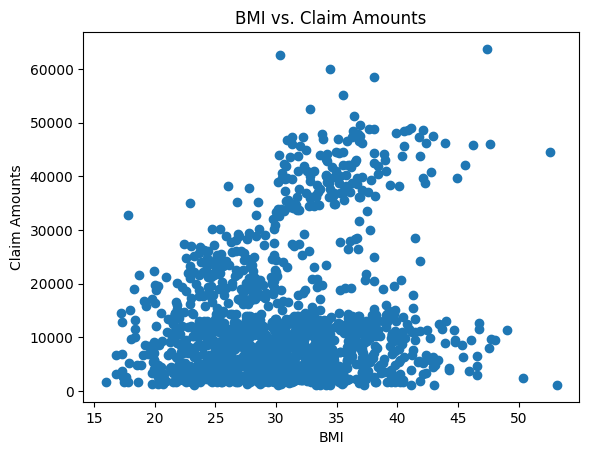

In [ ]:

plt.scatter(df['bmi'], df['charges in INR'])
plt.xlabel('BMI')
plt.ylabel('Claim Amounts')
plt.title('BMI vs. Claim Amounts')
plt.show()


In [ ]:
from scipy.stats import pearsonr

correlation, p_value = pearsonr(df['bmi'], df['charges in INR'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.19834096883362895
P-value: 2.459085535116766e-13


In [ ]:
grouped_data = df.groupby('children')
average_claim_amounts = grouped_data['charges in INR'].mean()
print(average_claim_amounts)


children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64


In [ ]:
from scipy.stats import f_oneway

# Extract the claimed amounts for each dependency category
dependent_1 = df[df['children'] == 1]['charges in INR']
dependent_2 = df[df['children'] == 2]['charges in INR']
dependent_3 = df[df['children'] == 3]['charges in INR']
dependent_4 = df[df['children'] == 4]['charges in INR']
dependent_5 = df[df['children'] == 5]['charges in INR']
dependent_0 = df[df['children'] == 0]['charges in INR']


# Perform one-way ANOVA
statistic, p_value = f_oneway(dependent_1, dependent_2, dependent_3,dependent_4,dependent_5,dependent_0)
print(f"p-value: {p_value}")


p-value: 0.00578568138087587


Fails to reject null hyppothesis. there is no significant differences between them

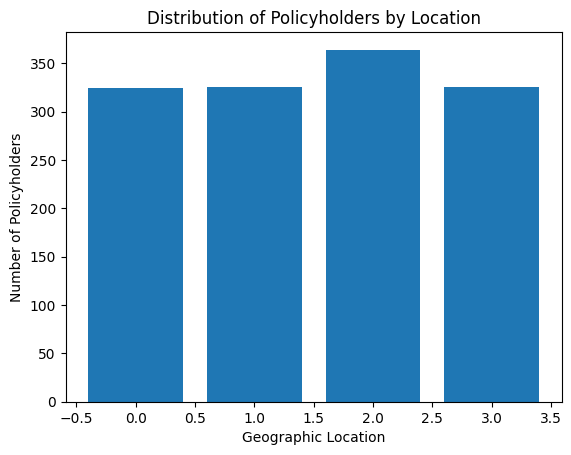

In [ ]:
import matplotlib.pyplot as plt

location_counts = df['region'].value_counts()
plt.bar(location_counts.index, location_counts.values)
plt.xlabel('Geographic Location')
plt.ylabel('Number of Policyholders')
plt.title('Distribution of Policyholders by Location')
plt.show()


In [ ]:
region_groups = df.groupby('region')

average_claim_amounts = region_groups['charges in INR'].mean()
claim_frequency = region_groups.size() / len(df)  # Claim frequency as a percentage

print("Average Claim Amounts by Region:")
print(average_claim_amounts)
print("\nClaim Frequency by Region:")
print(claim_frequency)


Average Claim Amounts by Region:
region
0    13406.384516
1    12417.575374
2    14735.411438
3    12346.937377
Name: charges in INR, dtype: float64

Claim Frequency by Region:
region
0    0.242152
1    0.242900
2    0.272048
3    0.242900
dtype: float64


In [ ]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
statistic, p_value = f_oneway(
    df[df['region'] == 1]['charges in INR'],
    df[df['region'] == 2]['charges in INR'],
    df[df['region'] == 3]['charges in INR'],
    df[df['region'] == 0]['charges in INR'],

)
print(f"p-value: {p_value}")


p-value: 0.0308933560705201


In [ ]:
grouped_data = df.groupby(['children', 'smoke','region'])

average_spent = grouped_data['charges in INR'].mean()
print(average_spent)


children  smoke  region
0         0.0    0          8072.292087
                 1          7544.599465
                 2          7060.081927
                 3          7754.154606
          1.0    0         28167.025698
                 1         28333.342459
                 2         35515.493747
                 3         30851.768705
1         0.0    0          9898.237996
                 1          7981.626547
                 2          8016.476172
                 3          7647.231189
          1.0    0         32340.127420
                 1         26470.360150
                 2         32503.010303
                 3         34549.955393
2         0.0    0         11669.296532
                 1          9950.850354
                 2          7519.504892
                 3          8946.971775
          1.0    0         22695.814939
                 1         31031.636355
                 2         37619.045906
                 3         37569.400345
3         0.0   

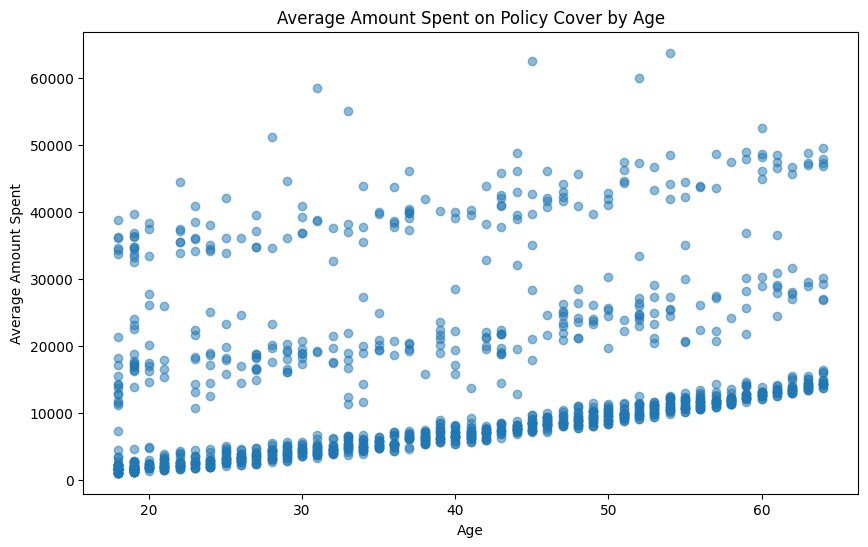

In [ ]:
import matplotlib.pyplot as plt

#Analyzing the influence of age on average expenditure
plt.figure(figsize=(10, 6))
plt.plot(df['age'], df['charges in INR'], 'o', alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Average Amount Spent')
plt.title('Average Amount Spent on Policy Cover by Age')
plt.show()


In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm

#  Assessing the influence of BMI on average expenditure
correlation, p_value = pearsonr(df['bmi'], df['charges in INR'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

 #Multiple linear regression to assess multiple factors
X = df[['age', 'bmi', 'children', 'smoke','region']]
X = sm.add_constant(X)
y = df['charges in INR']

model = sm.OLS(y, X).fit()
print(model.summary())


Correlation coefficient: 0.19834096883362895
P-value: 2.459085535116766e-13
                            OLS Regression Results                            
Dep. Variable:         charges in INR   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        09:31:05   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
s = scaler.fit_transform(df)
df=pd.DataFrame(s,columns=df.columns)

In [ ]:
df

,children,region,age,bmi,charges in INR,smoke,Gender
0,-0.908614,1.343905,-1.153959,0.612969,-0.945322,-0.507463,0.989591
1,-0.078767,1.343905,-1.438764,-0.994667,-0.944463,-0.507463,0.989591
2,-0.908614,1.343905,1.195680,1.580832,-0.220399,-0.507463,0.989591
3,-0.078767,1.343905,-0.655551,0.284880,-0.753434,-0.507463,-1.010519
4,3.240619,1.343905,-1.438764,-0.338489,-0.708986,-0.507463,-1.010519
...,...,...,...,...,...,...,...
1333,-0.078767,-1.372326,-0.014740,-0.121130,0.759294,1.970587,0.989591
1334,-0.908614,-1.372326,-1.509965,-1.476958,0.083684,1.970587,-1.010519
1335,0.751079,-1.372326,0.198863,-0.993847,0.659945,1.970587,0.989591
1336,-0.908614,-1.372326,-0.726752,-1.445789,0.235008,1.970587,-1.010519


In [ ]:
# Assessing the influence of BMI on average expenditure
correlation, p_value = pearsonr(df['bmi'], df['charges in INR'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Multiple linear regression to assess multiple factors
X = df[['age', 'bmi', 'children', 'smoke','region']]
X = sm.add_constant(X)
y = df['charges in INR']

model = sm.OLS(y, X).fit()
print(model.summary())


Correlation coefficient: 0.19834096883362892
P-value: 2.459085535116766e-13
                            OLS Regression Results                            
Dep. Variable:         charges in INR   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        09:31:57   Log-Likelihood:                -969.21
No. Observations:                1338   AIC:                             1950.
Df Residuals:                    1332   BIC:                             1982.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [ ]:
res = dict()

In [ ]:
# modelling the data
#SINCE I AM NOT HANDLING THE OULIERS I WILL USE ROBUST REGRESSION, DECISION TREE REGRESSOR AND SVM
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std
from numpy import absolute
import matplotlib.pyplot as plt
from numpy import arange

model = LinearRegression()
X = df[['age', 'bmi', 'children', 'smoke','region']]
y = df['charges in INR']
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
print(absolute(scores))
res['Linear Regression']=absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(absolute(scores)), std(absolute(scores))))




[0.37327871 0.32088459 0.38103297 0.32192516 0.35432846 0.33683063
 0.32840324 0.38638761 0.339188   0.32023259 0.36177072 0.3430888
 0.35513477 0.36350041 0.33052194 0.34683788 0.34104224 0.28659328
 0.3209757  0.41104918 0.32242949 0.3316938  0.32403876 0.36677795
 0.40768185 0.33406476 0.3054019  0.3753766  0.36043206 0.33184287]
Mean MAE: 0.346 (0.028)


In [ ]:
from sklearn.linear_model import HuberRegressor
# robust regression
model = HuberRegressor()
X = df[['age', 'bmi', 'children', 'smoke','region']]
y = df['charges in INR']
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
print(absolute(scores))
res['Huber Regression']=absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(absolute(scores)), std(absolute(scores))))

model.fit(X,y)
# Get the robust regression parameters
robust_params = model.coef_
robust_intercept = model.intercept_

# Print the estimated parameters
print("Robust Parameters:")
print("Slope:", robust_params)
print("Intercept:", robust_intercept)

[0.30994907 0.22603908 0.33513305 0.28413085 0.28018759 0.27813742
 0.2223242  0.34890516 0.29346937 0.26475883 0.31947088 0.28129866
 0.28958184 0.33666315 0.24289994 0.27716125 0.27474025 0.20889834
 0.26200253 0.34847606 0.26135227 0.27075755 0.26583882 0.28818432
 0.37406727 0.28414509 0.22375882 0.3186651  0.3068634  0.24640114]
Mean MAE: 0.284 (0.040)
Robust Parameters:
Slope: [ 0.30791773  0.02347533  0.04340755  1.03241054 -0.02068412]
Intercept: 0.015348553259586317


In [ ]:
from sklearn.linear_model import RANSACRegressor
# robust regression
model = RANSACRegressor()
X = df[['age', 'bmi', 'children', 'smoke','region']]
y = df['charges in INR']
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
print(absolute(scores))
res['RANSAC Regression']=absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(absolute(scores)), std(absolute(scores))))

model.fit(X,y)
inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

# Get the robust regression parameters
robust_params = model.estimator_.coef_
robust_intercept = model.estimator_.intercept_

# Print the estimated parameters
print("Robust Parameters:")
print("Slope:", robust_params)
print("Intercept:", robust_intercept)

[0.35413838 0.22688724 0.34195161 0.3001485  0.2825231  0.25884486
 0.22705933 0.36126881 0.3094213  0.27180179 0.32310075 0.28586243
 0.29132575 0.33274857 0.2466115  0.32017496 0.28924841 0.23693212
 0.27195878 0.43144093 0.27413636 0.27826836 0.27178792 0.29438384
 0.38080911 0.30932923 0.2702891  0.33218556 0.34841712 0.24222766]
Mean MAE: 0.299 (0.047)
Robust Parameters:
Slope: [ 0.31198523  0.01081184  0.04403021  1.13339167 -0.01716965]
Intercept: 0.05809737091030323


In [ ]:
from sklearn.linear_model import TheilSenRegressor
# robust regression
model = TheilSenRegressor()
X = df[['age', 'bmi', 'children', 'smoke','region']]
y = df['charges in INR']
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 # evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
 # force scores to be positive
print(absolute(scores))
res['TheilSen Regression']=absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(absolute(scores)), std(absolute(scores))))

model.fit(X,y)
# Print the estimated parameters
print("Robust Parameters:")
print("Slope:", model.coef_)
print("Intercept:", model.intercept_)

[0.34047653 0.32032227 0.36729926 0.26343781 0.34741894 0.26231982
 0.2672354  0.36155096 0.2887989  0.30470298 0.33969698 0.33195411
 0.31638336 0.32489622 0.30960355 0.3142522  0.27404313 0.23271942
 0.26858548 0.41526254 0.26162888 0.27996452 0.28717736 0.32164779
 0.38545867 0.30991634 0.25628644 0.34131288 0.33744776 0.34065579]
Mean MAE: 0.312 (0.042)
Robust Parameters:
Slope: [ 0.30226053  0.04098086  0.05364983  0.52537608 -0.02548533]
Intercept: -0.22012323985404292


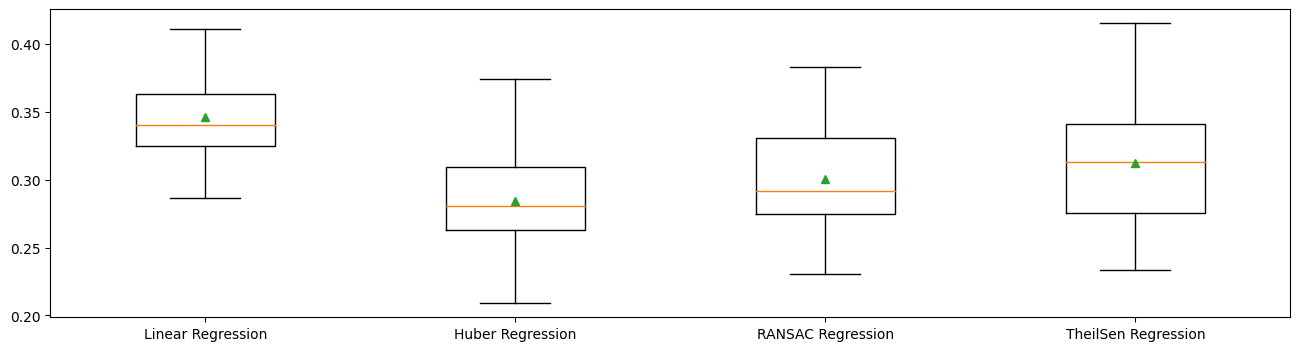

In [ ]:
plt.figure(figsize=(16,4))
plt.boxplot(res.values(), labels=res.keys(), showmeans=True)
plt.show()

In [ ]:
# using Decision tree Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assume you have your independent variable X and dependent variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor object
rf_regressor = RandomForestRegressor()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new Random Forest Regressor with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)

# Fit the model to the training data
best_rf_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred = best_rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

# Calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean squared error
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.13441071396578427
Mean Absolute Error: 0.19899757616392197


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Assume you have your independent variable X and dependent variable y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR object
svr = SVR()

# Fit the SVR model to the training data
svr.fit(X_train, y_train)

# Predict on the testing data
y_pred = svr.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)
# Calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)

# Print the mean squared error
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.14888980630228643
Mean Absolute Error: 0.2030632912879846


In [ ]:
res['Decision Tree']=0.2030632912879846
res['SVM']=0.19899757616392197